# Linear regression example
In this example, we are again using a dataset with [YouTube statistics from the top 5000 channels](https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade)

In [1]:
import seaborn as sns
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('youtube.csv')
df = df.sort_values(by='subscribers', ascending=False) #sort the data set to see the biggest channels first

df.head(10)

,name,uploads,subscribers,views
644,PewDiePie,3601,65995310,18684630003
275,T-Series,12661,61196302,47548839843
1724,Canal KondZilla,822,39409726,19291034467
3264,Dude Perfect,185,34489432,6095981611
3529,HolaSoyGerman.,137,34480357,3617584451
3621,JustinBieberVEVO,123,34284457,17806717170
3627,Ed Sheeran,122,33961184,14521211040
962,5-Minute Crafts,2085,33492951,8587520379
120,WWE,36756,32852346,26273668433
2596,whinderssonnunes,349,31332790,2574018722


Again, these big numbers are kind of hard to work with. Let's divide the subscribers and views by a million to get "millions of subscribers" and "millions of views".

In [4]:
df['subscribers_m'] = df['subscribers'] / 1000000
df['views_m'] = df['views'] / 1000000

Let's see if we can find a relation between subscribers and views. Let's first plot the relation. We'll plot subscribers on the x-asis, because subscribers are more likely to be the cause of views, than vice versa. That is, subscribers is our _independent_ variable, views our _dependent variable_.

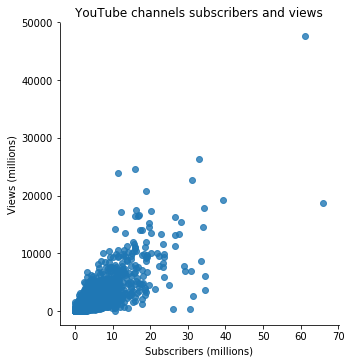

In [5]:
sns.lmplot(x='subscribers_m', y='views_m', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Subscribers (millions)')
plt.ylabel('Views (millions)')
plt.title('YouTube channels subscribers and views')
plt.show()

There are a few things to note here:
1. First, the data seem to fit a linear pattern: you can draw a straight line to fit the points
2. However, there is quite a bit of variation around this line. Some points will be above it, some below.
3. This variation seems to increase with the number of subscribers. That is, the more subscribers, the more uncertain the relation between subscribers and views.

Let's draw the line. In fact, Seaborn will automatically fit a line if you do not include the `fit_reg=False` argument:

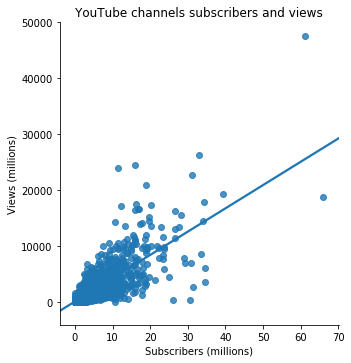

In [6]:
sns.lmplot(x='subscribers_m', y='views_m', data=df, ci=False) #The last argument leaves out a so-called "confidence interval"
plt.title('YouTube channels subscribers and views')
plt.xlabel('Subscribers (millions)')
plt.ylabel('Views (millions)')
plt.show()

Let's fit a linear model to determine the coefficients of the line. We'll do this with the machine learning package `sk-learn`.

In [17]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

x = df[['subscribers_m']] #to use sk-learn, we need to create lists of the two variables
y = df['views_m']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.intercept_ #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals. 

The regression line is equal to y = 416.79 + 45.78X


Or, in a pretty Markdown formula (using $ to begin and end a formula):

$y= 416.79 + 45.78x$

Where _y_ is views in millions and _x_ is subscribers in millions.